In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

<h3 style="color:#70C1B3; font-weight:bold">Advanced Data Analysis</h3>

In [3]:
data = pd.read_csv('CleanData.csv')

In [4]:
data_sales = data.groupby("Order Date")["Sales"].sum().reset_index()
data_sales.set_index("Order Date", inplace=True)
data_sales

,Sales
Order Date,
2012-01-01,808.563000
2012-01-02,314.220000
2012-01-03,3814.236388
2012-01-04,1741.925303
2012-01-05,1215.005062
...,...
2015-12-27,10492.234260
2015-12-28,1647.174000
2015-12-29,20221.677030


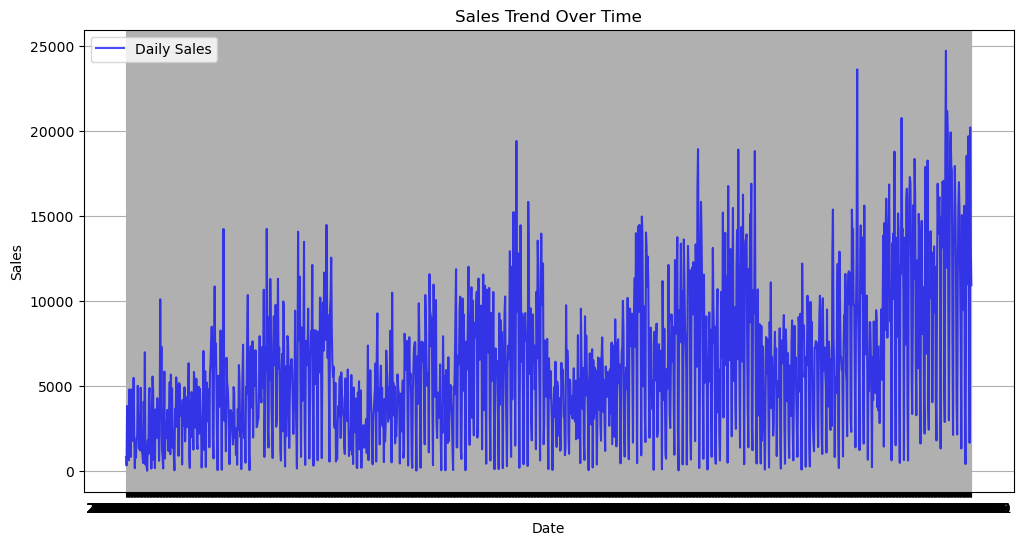

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(data_sales, label="Daily Sales", color="blue", alpha=0.7)
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.savefig("sales_trend.png")

plt.show()

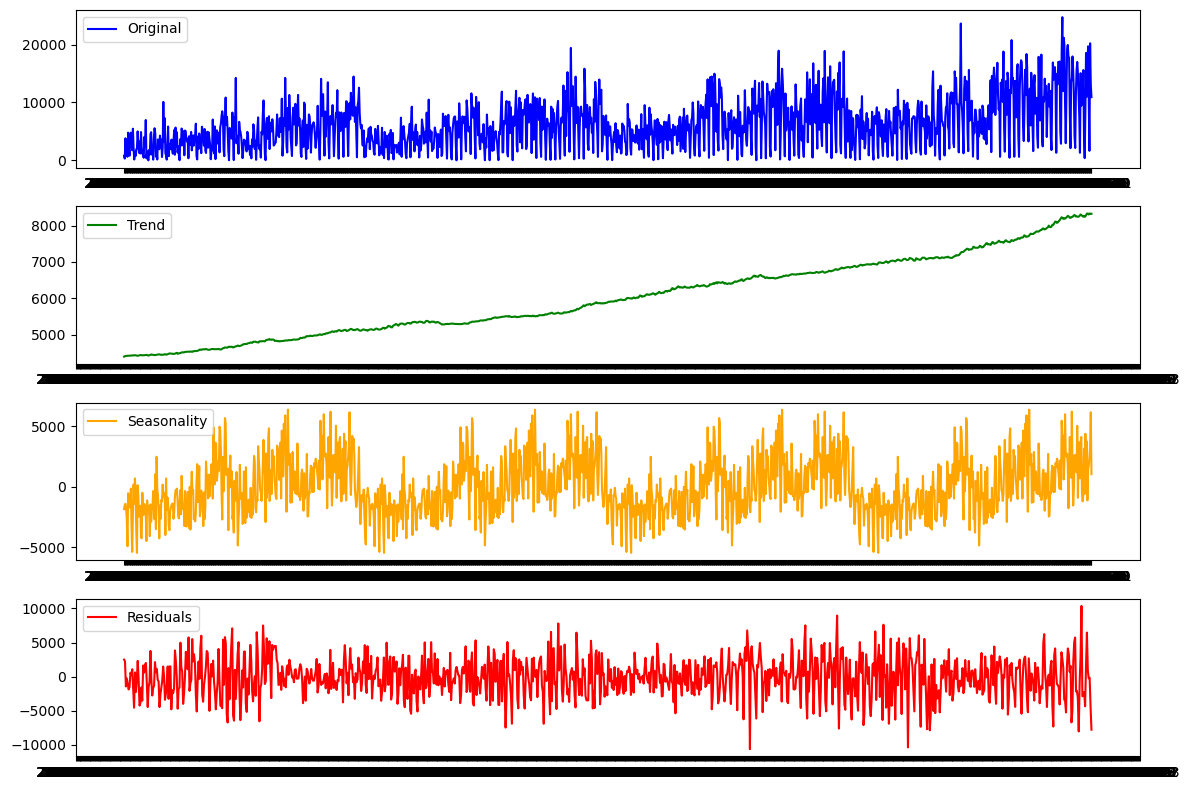

In [8]:
decomposition = seasonal_decompose(data_sales, model="additive", period=365)
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(data_sales, label="Original", color="blue")
plt.legend()
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label="Trend", color="green")
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label="Seasonality", color="orange")
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label="Residuals", color="red")
plt.legend()
plt.tight_layout()
plt.savefig("decomposition.png", dpi=300, bbox_inches='tight')

plt.show()

In [9]:
adf_test = adfuller(data_sales["Sales"])
adf_results = {
    "ADF Statistic": adf_test[0],
    "p-value": adf_test[1],
    "Critical Values": adf_test[4]
}
print("ADF Test Results:", adf_results)

ADF Test Results: {'ADF Statistic': -2.9231628362246536, 'p-value': 0.04272001729157925, 'Critical Values': {'1%': -3.435002884902567, '5%': -2.8635949199569324, '10%': -2.56786403055995}}


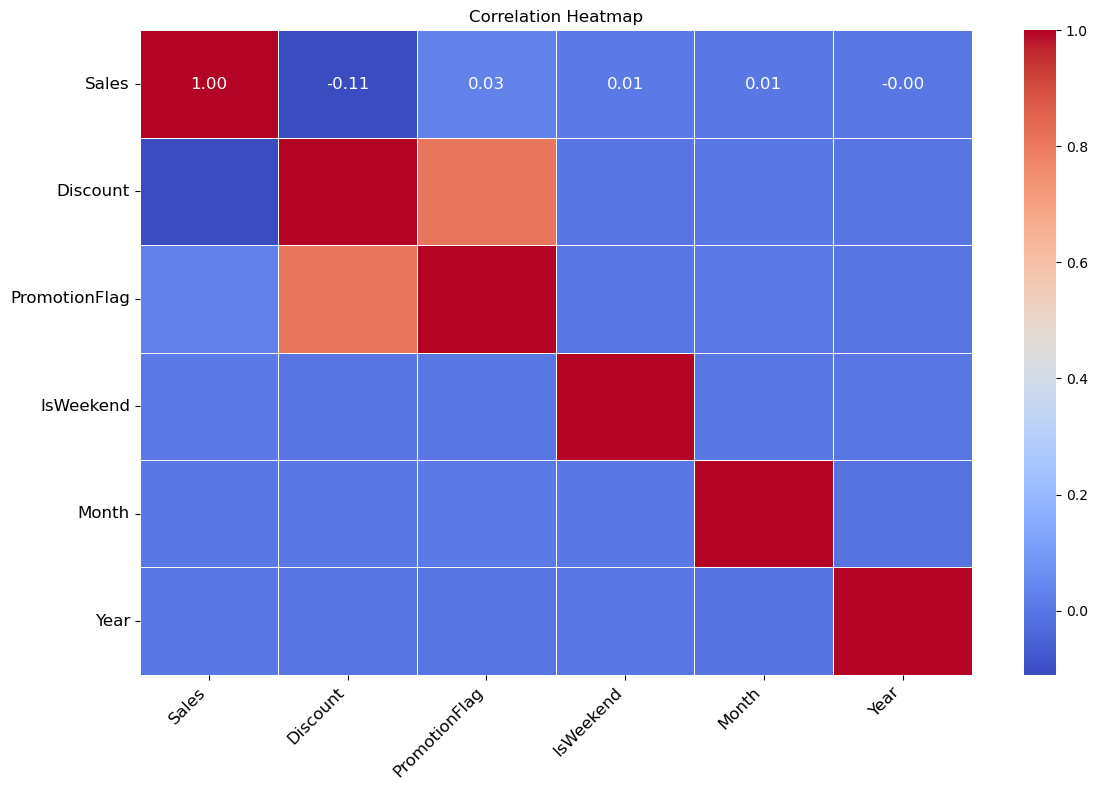

In [12]:
correlation_cols = ["Sales", "Discount", "PromotionFlag", "IsWeekend", "Month", "Year"]
df_corr = data[correlation_cols]
correlation_matrix = df_corr.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"size": 12})
plt.title("Correlation Heatmap")
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.savefig("Correlation.png", dpi=300, bbox_inches='tight')

plt.show()

In [13]:
correlation_matrix

,Sales,Discount,PromotionFlag,IsWeekend,Month,Year
Sales,1.000000,-0.110905,0.029002,0.008458,0.005227,-0.002172
Discount,-0.110905,1.000000,0.812491,-0.005803,0.002938,-0.003103
PromotionFlag,0.029002,0.812491,1.000000,0.000222,0.007966,-0.005762
IsWeekend,0.008458,-0.005803,0.000222,1.000000,0.002029,-0.001913
Month,0.005227,0.002938,0.007966,0.002029,1.000000,-0.011016
Year,-0.002172,-0.003103,-0.005762,-0.001913,-0.011016,1.000000
